Este modelo de Machine Learning, busca predecir el Score que tendra un anime que esta por salir, metiendonos en el papel de Data Scientist de un estudio de animación nos piden realizar este modelo para saber si tendria sentido sacar otra temporada

Para este modelo primero comenzaré con el dataset de MAL sin los usuarios ya que en el mismo estan los puntajes dados por ellos sin los datos personales que no nos importarian mucho

## Librerias

In [1]:
import sys 
import os  # obtener el path del jupyter tenemos esto 
root_path = os.path.dirname(os.getcwd())  
root_path  
sys.path.append(root_path)  
sys.path
print('.')

.


In [7]:
from Utils.Librerias import *
from Utils.Path import *
from Utils.Visualizacion import *
from Utils.Limpieza import *
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

## Carga de Datos

In [8]:
MAL = pd.read_csv(AnimeList)

## Limpieza de Datos

Voy a descargar las columnas que no me interesan para tener unos datos mas tratables

In [9]:
MAL = MAL[['title', 'type', 'source', 'rating', 'score', 'scored_by', 'rank', 'popularity', 'members', 'favorites', 'aired_string']]

Comprobamos elementos NULL

In [10]:
MAL.isnull().sum()

title              0
type               0
source             0
rating             0
score              0
scored_by          0
rank            1574
popularity         0
members            0
favorites          0
aired_string       0
dtype: int64

Eliminamos los NULL

In [11]:
MAL.dropna(inplace = True) 

Modificamos la fecha para tener solo el año

In [12]:
MAL.aired_string

0        Jan 13, 2012 to Mar 30, 2012
1          Apr 2, 2007 to Oct 1, 2007
2         Oct 4, 2008 to Sep 25, 2009
3        Aug 16, 2002 to May 23, 2003
4         Oct 6, 2012 to Mar 30, 2013
                     ...             
14472                            1989
14473      Nov 5, 1987 to Nov 4, 1988
14474                    Mar 21, 1986
14476                   Not available
14477                     Apr 7, 2010
Name: aired_string, Length: 12904, dtype: object

In [13]:
aired_to_year(MAL,'aired_string')
only_year(MAL,'Year_Aired')
MAL = MAL.drop(['aired_string', 'Year_Aired'], axis=1)
MAL = MAL.drop(MAL[MAL['Year'] == 'Unknown'].index)

Aplicamos un map para transformar los valores str en int

In [14]:
MAL['type'] = MAL['type'].map({'TV': 0, 'Music': 1, 'OVA': 2, 'ONA': 3, 'Special': 4, 'Movie': 5})
MAL['source'] = MAL['source'].map({'Manga': 0, 'Original': 1, 'Light novel': 2, '4-koma manga': 3, 'Novel': 4, 'Visual novel': 5, 
                                    'Unknown': 6, 'Other': 7, 'Music': 8, 'Game': 9, 'Picture book': 10, 'Card game': 11, 
                                    'Web manga': 12, 'Book': 13, 'Radio': 14, 'Digital manga': 15})
MAL['rating'] = MAL['rating'].map({'PG-13 - Teens 13 or older': 0, 'PG - Children': 1, 'G - All Ages': 2, 'R+ - Mild Nudity': 3, 
                                    'R - 17+ (violence & profanity)': 4, 'None': 5, 'Rx - Hentai': 6})
MAL['Year'] = MAL['Year'].astype(int)


## Visualización de los Datos

In [10]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

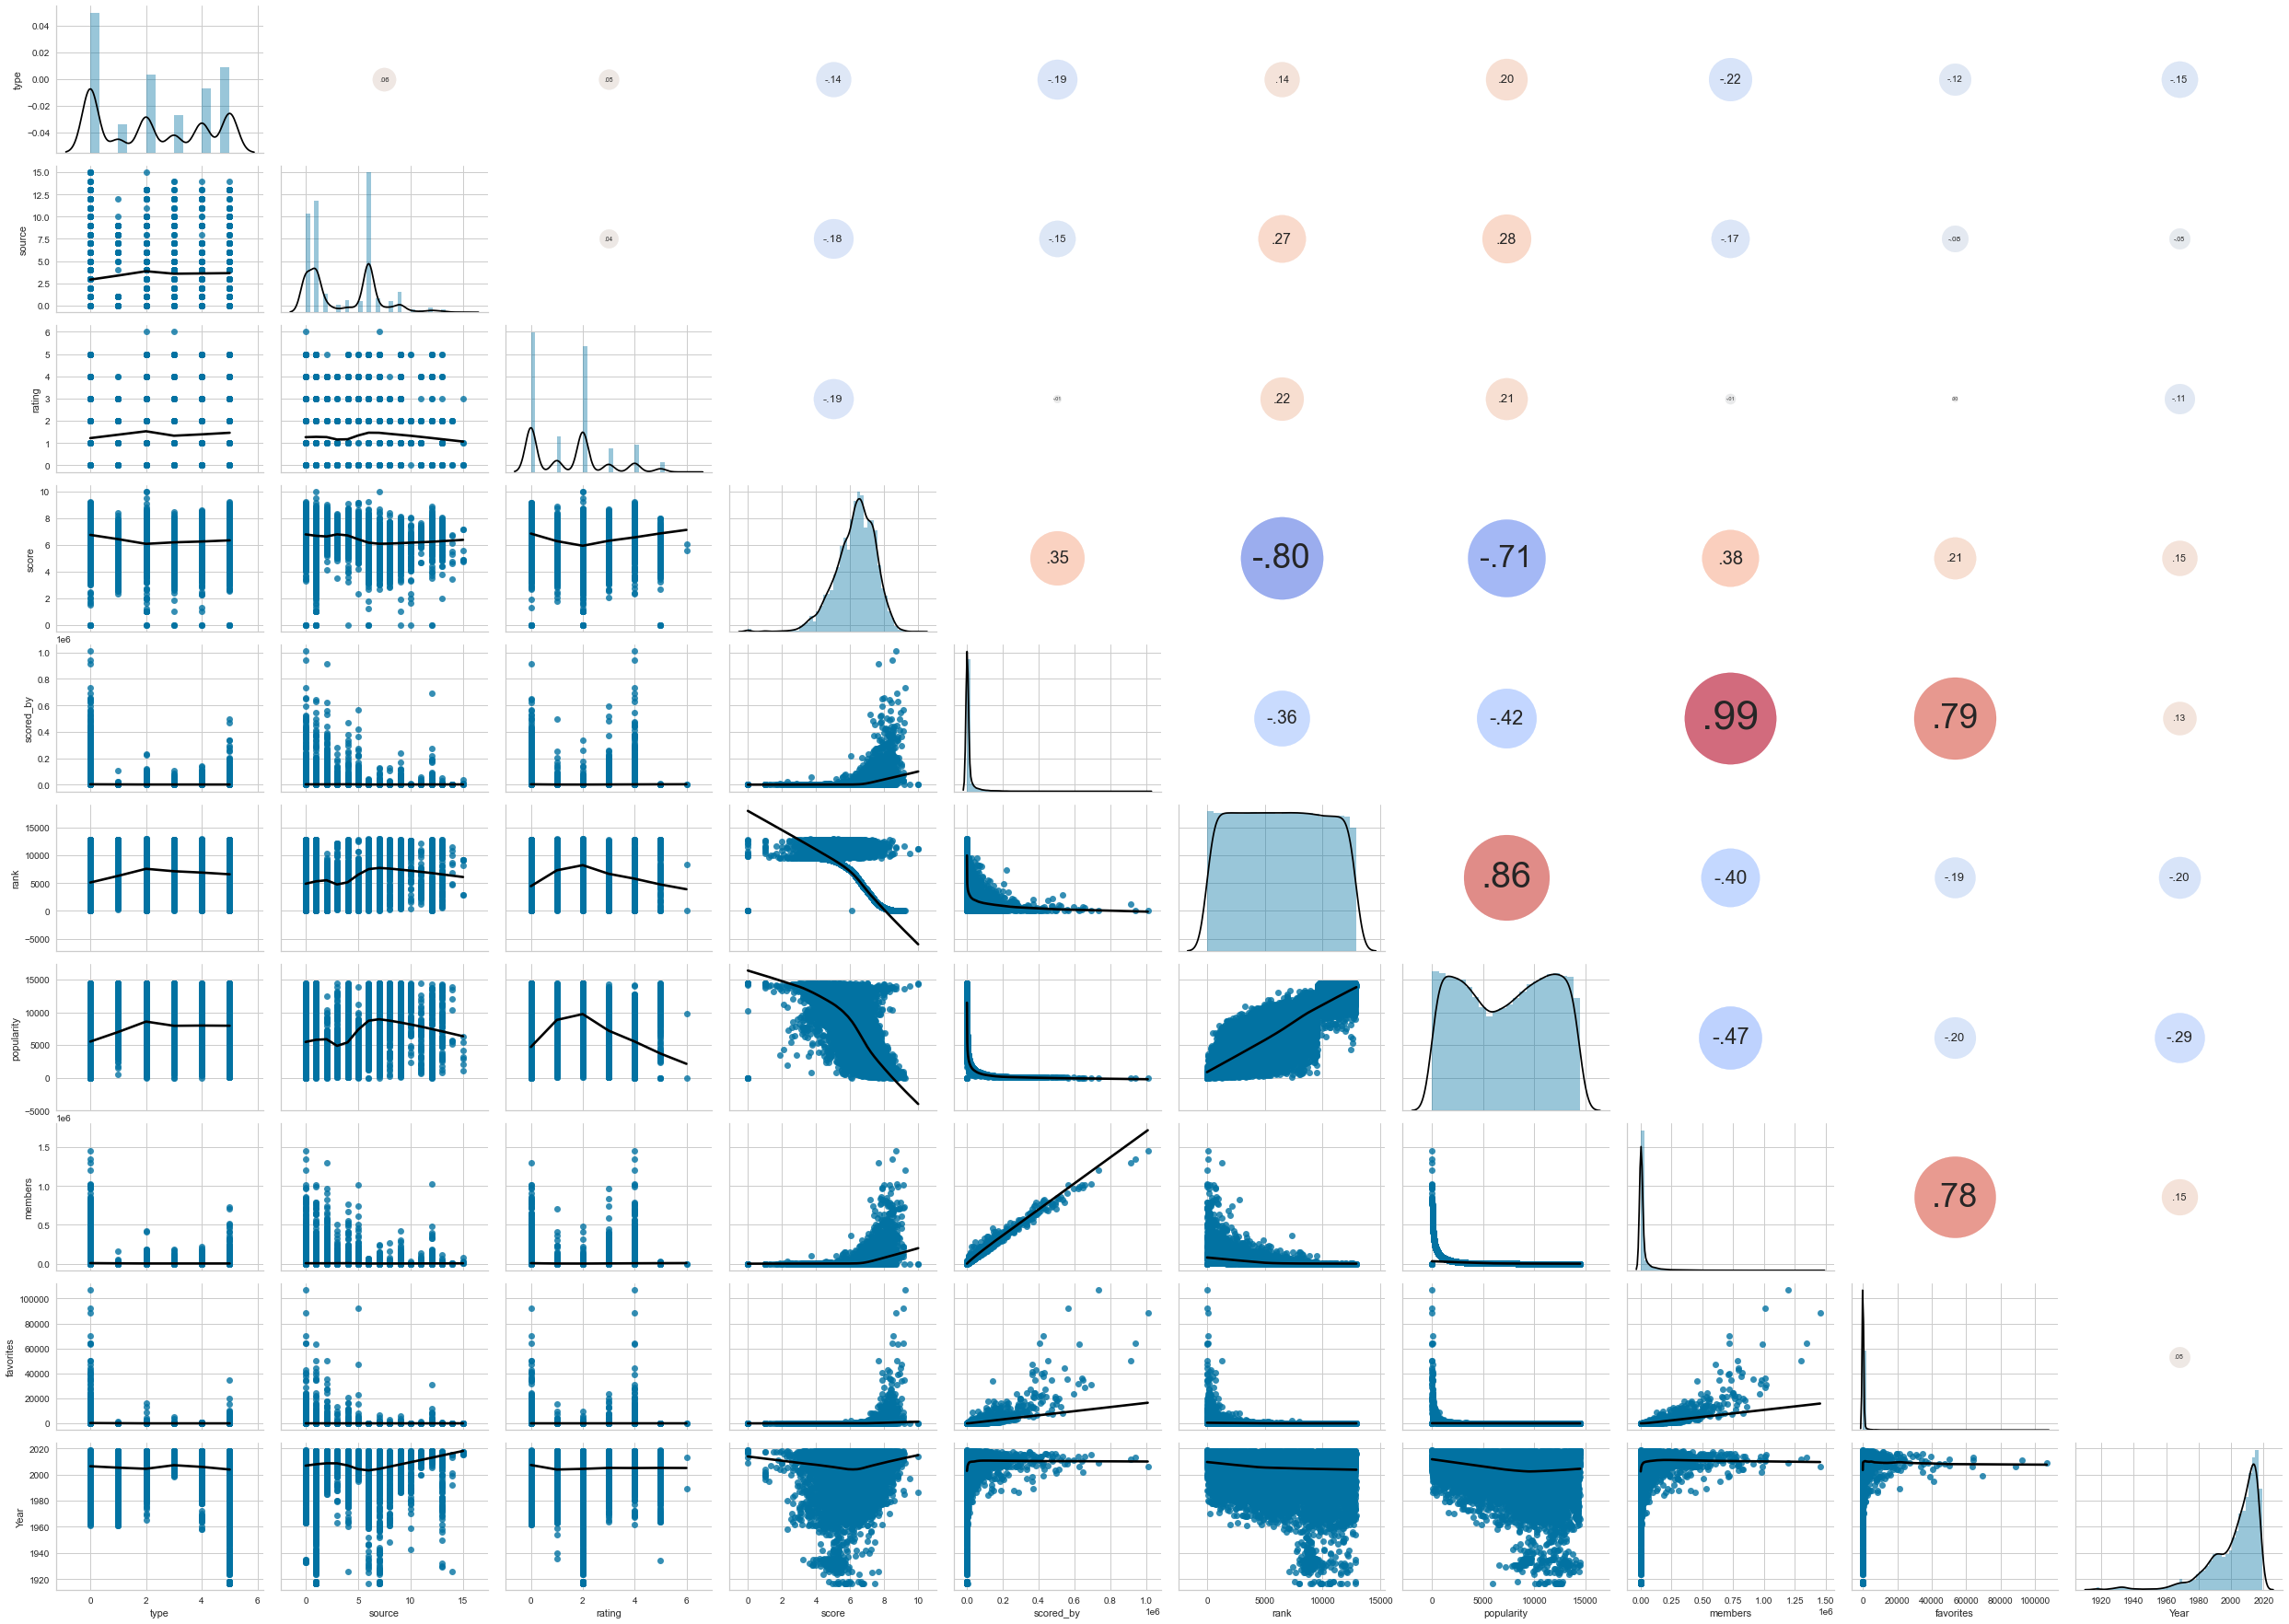

In [12]:
g = sns.PairGrid(MAL, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

## Train y Test

Separamos los datos en train y test

In [15]:
X = MAL.drop(['title', 'score', 'rank'], axis=1)
y = MAL[['score']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=42)

## Prueba de Modelos

Utilizamos el modulo Pycaret para la busqueda de modelos

In [15]:
MAL_Pycaret = MAL.drop(['title','rank'],axis=1)

In [16]:
data = MAL_Pycaret.sample(frac=0.9, random_state=786)
data_unseen = MAL_Pycaret.drop(data.index)

In [17]:
modelos = setup(data = data, target = 'score', session_id=123) 

,Description,Value
0,session_id,123
1,Target,score
2,Original Data,"(11514, 9)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(8059, 34)"


In [18]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.4448,0.3972,0.6291,0.7032,0.1097,0.0807,0.5410
rf,Random Forest Regressor,0.4493,0.4001,0.6315,0.7012,0.1040,0.0817,0.3520
xgboost,Extreme Gradient Boosting,0.4559,0.4113,0.6403,0.6925,0.1050,0.0830,0.2530
lightgbm,Light Gradient Boosting Machine,0.4533,0.4144,0.6426,0.6902,0.1131,0.0818,0.0380
et,Extra Trees Regressor,0.4625,0.4302,0.6544,0.6790,0.1136,0.0835,0.3120
gbr,Gradient Boosting Regressor,0.4735,0.4323,0.6563,0.6765,0.1065,0.0867,0.1300
lr,Linear Regression,0.5545,0.6001,0.7734,0.5522,0.1386,0.0985,0.3010
ridge,Ridge Regression,0.5545,0.6000,0.7734,0.5522,0.1386,0.0985,0.0200
br,Bayesian Ridge,0.5543,0.6001,0.7734,0.5522,0.1386,0.0986,0.0190
lar,Least Angle Regression,0.5553,0.6009,0.7739,0.5516,0.1387,0.0987,0.0220


voy a analizar los primeros 3 modelos y el de regresion linial para ver cual se adapta mejor a los datos

El procedimiento el crear el modelo con el comando create model y luego aplicarle el tunned para mejorarlo

In [19]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4402,0.3827,0.6186,0.6929,0.0987,0.0797
1,0.4575,0.4313,0.6567,0.7093,0.1086,0.0870
2,0.4339,0.3680,0.6066,0.7039,0.0909,0.0747
3,0.4420,0.3654,0.6045,0.7266,0.0949,0.0758
4,0.4757,0.4494,0.6704,0.6442,0.1074,0.0874
5,0.4181,0.3343,0.5782,0.7330,0.0899,0.0744
6,0.4771,0.4559,0.6752,0.6667,0.1085,0.0891
7,0.4794,0.4637,0.6810,0.6869,0.1189,0.0967
8,0.4309,0.3435,0.5860,0.7447,0.1067,0.0746
9,0.4377,0.4067,0.6377,0.7037,0.1156,0.0774


In [20]:
tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4874,0.4711,0.6863,0.6220,0.1203,0.0880
1,0.5160,0.5201,0.7212,0.6494,0.1345,0.0951
2,0.4844,0.4423,0.6650,0.6441,0.0994,0.0837
3,0.4993,0.4771,0.6907,0.6431,0.1352,0.0832
4,0.5261,0.5156,0.7180,0.5919,0.1136,0.0962
5,0.4731,0.4102,0.6405,0.6724,0.0992,0.0844
6,0.5239,0.5269,0.7259,0.6148,0.1357,0.0966
7,0.5105,0.5304,0.7283,0.6419,0.1364,0.1040
8,0.4690,0.3992,0.6318,0.7033,0.1214,0.0805
9,0.4861,0.4755,0.6896,0.6536,0.1402,0.0851


In [21]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4336,0.3939,0.6276,0.6839,0.1135,0.0782
1,0.4518,0.4169,0.6457,0.7190,0.1128,0.0844
2,0.4281,0.3675,0.6062,0.7043,0.0922,0.0740
3,0.4422,0.3773,0.6142,0.7177,0.1110,0.0747
4,0.4699,0.4434,0.6659,0.6490,0.1089,0.0869
5,0.4112,0.3183,0.5642,0.7458,0.0878,0.0732
6,0.4858,0.4710,0.6863,0.6556,0.1226,0.0892
7,0.4708,0.4505,0.6712,0.6958,0.1201,0.0959
8,0.4183,0.3296,0.5741,0.7550,0.1009,0.0739
9,0.4362,0.4038,0.6354,0.7059,0.1271,0.0768


In [22]:
tuned_catboost = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4439,0.4190,0.6473,0.6637,0.1188,0.0797
1,0.4532,0.4167,0.6455,0.7191,0.1120,0.0851
2,0.4359,0.3687,0.6072,0.7034,0.0917,0.0753
3,0.4403,0.3684,0.6070,0.7244,0.1012,0.0750
4,0.4724,0.4476,0.6690,0.6457,0.1081,0.0874
5,0.4197,0.3305,0.5749,0.7361,0.0893,0.0746
6,0.4950,0.4822,0.6944,0.6474,0.1229,0.0911
7,0.4779,0.4727,0.6875,0.6809,0.1262,0.0979
8,0.4232,0.3409,0.5839,0.7466,0.1114,0.0740
9,0.4437,0.4183,0.6468,0.6953,0.1284,0.0783


In [23]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4693,0.4423,0.6651,0.6450,0.1069,0.0859
1,0.4850,0.4617,0.6795,0.6888,0.1111,0.0914
2,0.4734,0.4314,0.6568,0.6529,0.0992,0.0825
3,0.4641,0.4008,0.6331,0.7002,0.0954,0.0799
4,0.5032,0.4915,0.7010,0.6110,0.1115,0.0928
5,0.4463,0.3784,0.6151,0.6978,0.0959,0.0799
6,0.5062,0.4791,0.6922,0.6497,0.1120,0.0948
7,0.4902,0.4921,0.7015,0.6677,0.1245,0.1012
8,0.4373,0.3271,0.5719,0.7569,0.0954,0.0759
9,0.4600,0.4186,0.6470,0.6951,0.1128,0.0827


In [24]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4384,0.3957,0.6290,0.6825,0.1057,0.0789
1,0.4643,0.4450,0.6671,0.7000,0.1101,0.0876
2,0.4329,0.3589,0.5991,0.7112,0.0899,0.0746
3,0.4554,0.4068,0.6378,0.6956,0.1001,0.0785
4,0.4841,0.4769,0.6906,0.6225,0.1105,0.0882
5,0.4297,0.3433,0.5859,0.7258,0.0904,0.0758
6,0.4900,0.4675,0.6838,0.6581,0.1087,0.0906
7,0.4811,0.4632,0.6806,0.6872,0.1182,0.0959
8,0.4439,0.3635,0.6029,0.7298,0.0984,0.0778
9,0.4433,0.4174,0.6461,0.6959,0.1182,0.0782


In [25]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5496,0.5999,0.7745,0.5186,0.1362,0.0974
1,0.5713,0.6753,0.8218,0.5448,0.1558,0.1032
2,0.5362,0.5144,0.7172,0.5861,0.1068,0.0927
3,0.5699,0.6663,0.8163,0.5015,0.1593,0.0928
4,0.5796,0.6025,0.7762,0.5231,0.1209,0.1043
5,0.5341,0.4984,0.7060,0.6020,0.1077,0.0940
6,0.5761,0.6760,0.8222,0.5057,0.1557,0.1045
7,0.5654,0.6704,0.8188,0.5473,0.1541,0.1136
8,0.5299,0.5135,0.7166,0.6183,0.1352,0.0908
9,0.5325,0.5842,0.7644,0.5744,0.1542,0.0919


In [26]:
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5496,0.5999,0.7745,0.5186,0.1362,0.0974
1,0.5713,0.6753,0.8218,0.5448,0.1558,0.1032
2,0.5362,0.5144,0.7172,0.5861,0.1068,0.0927
3,0.5699,0.6663,0.8163,0.5015,0.1593,0.0928
4,0.5796,0.6025,0.7762,0.5231,0.1209,0.1043
5,0.5341,0.4984,0.7060,0.6020,0.1077,0.0940
6,0.5761,0.6760,0.8222,0.5057,0.1557,0.1045
7,0.5654,0.6704,0.8188,0.5473,0.1541,0.1136
8,0.5299,0.5135,0.7166,0.6183,0.1352,0.0908
9,0.5325,0.5842,0.7644,0.5744,0.1542,0.0919


Ahora vamos a hacer una prediccion con cada modelo para ver cuales serian las metricas

In [27]:
predict_model(rf);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.4552,0.4181,0.6466,0.6901,0.1040,0.0839


In [28]:
predict_model(tuned_rf);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.5081,0.4939,0.7028,0.6340,0.1241,0.0937


In [29]:
predict_model(catboost);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.4501,0.4195,0.6477,0.6891,0.1129,0.0823


In [30]:
predict_model(tuned_catboost);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.4534,0.4173,0.6460,0.6908,0.1124,0.0837


In [31]:
predict_model(gbr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.4850,0.4547,0.6743,0.6630,0.1096,0.0906


In [32]:
predict_model(tuned_gbr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.4628,0.4410,0.6641,0.6732,0.1089,0.0859


In [33]:
predict_model(lr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.5601,0.6038,0.7770,0.5526,0.1386,0.1026


In [34]:
predict_model(tuned_lr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.5601,0.6038,0.7770,0.5526,0.1386,0.1026


Vamos a quedanos con los mejores modelos de cada modelo(con o sin tunned) e imprimimos cada modelo para ver cuales parametros se aplicaron

In [35]:
final_rf = finalize_model(rf)

In [36]:
print(final_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


In [37]:
final_catboost = finalize_model(catboost)

In [38]:
print(final_catboost)

In [39]:
final_gbr = finalize_model(gbr)

In [40]:
print(final_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [41]:
final_lr = finalize_model(lr)

In [42]:
print(final_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


In [43]:
predict_model(final_rf);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.1694,0.0593,0.2435,0.9561,0.0420,0.0312


In [44]:
predict_model(final_catboost);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.3782,0.2574,0.5073,0.8093,0.0821,0.0671


In [45]:
predict_model(final_gbr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.4687,0.4181,0.6466,0.6902,0.1051,0.0874


In [46]:
predict_model(final_lr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.5588,0.5995,0.7743,0.5557,0.1382,0.1022


A continuación voy a hacer las predicciones con los datos que no se han utilizado para comprar 

Se generará un nuevo dataframe con una columna llamda label que es la pedicción

In [47]:
unseen_predictions_rf = predict_model(final_rf, data=data_unseen)
unseen_predictions_rf.head()

,type,source,rating,score,scored_by,popularity,members,favorites,Year,Label
5,0,0,2,8.03,21618,1630,45625,826,2009,7.9189
18,0,0,3,7.85,59911,623,134537,2742,1989,8.0513
37,0,2,0,8.16,11924,2233,27481,201,2007,7.4512
39,0,0,0,6.30,16688,1858,37256,48,2010,6.8071
59,2,6,2,6.29,102,10547,285,0,1985,6.1341


In [48]:
unseen_predictions_cat = predict_model(final_catboost, data=data_unseen)
unseen_predictions_cat.head()

,type,source,rating,score,scored_by,popularity,members,favorites,Year,Label
5,0,0,2,8.03,21618,1630,45625,826,2009,8.032518
18,0,0,3,7.85,59911,623,134537,2742,1989,7.935559
37,0,2,0,8.16,11924,2233,27481,201,2007,7.397880
39,0,0,0,6.30,16688,1858,37256,48,2010,7.035808
59,2,6,2,6.29,102,10547,285,0,1985,5.927448


In [49]:
unseen_predictions_gbr = predict_model(final_gbr, data=data_unseen)
unseen_predictions_gbr.head()

,type,source,rating,score,scored_by,popularity,members,favorites,Year,Label
5,0,0,2,8.03,21618,1630,45625,826,2009,7.757394
18,0,0,3,7.85,59911,623,134537,2742,1989,7.884780
37,0,2,0,8.16,11924,2233,27481,201,2007,7.212950
39,0,0,0,6.30,16688,1858,37256,48,2010,7.154375
59,2,6,2,6.29,102,10547,285,0,1985,5.915172


In [50]:
unseen_predictions_lr = predict_model(final_lr, data=data_unseen)
unseen_predictions_lr.head()

,type,source,rating,score,scored_by,popularity,members,favorites,Year,Label
5,0,0,2,8.03,21618,1630,45625,826,2009,7.634928
18,0,0,3,7.85,59911,623,134537,2742,1989,7.433916
37,0,2,0,8.16,11924,2233,27481,201,2007,7.253185
39,0,0,0,6.30,16688,1858,37256,48,2010,7.522051
59,2,6,2,6.29,102,10547,285,0,1985,5.983193


In [51]:
best = compare_models(sort = 'MAE', n_select = 15)
compare_model_results = pull()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.4448,0.3972,0.6291,0.7032,0.1097,0.0807,0.5980
rf,Random Forest Regressor,0.4493,0.4001,0.6315,0.7012,0.1040,0.0817,0.3470
lightgbm,Light Gradient Boosting Machine,0.4533,0.4144,0.6426,0.6902,0.1131,0.0818,0.0390
xgboost,Extreme Gradient Boosting,0.4559,0.4113,0.6403,0.6925,0.1050,0.0830,0.2690
et,Extra Trees Regressor,0.4625,0.4302,0.6544,0.6790,0.1136,0.0835,0.3430
gbr,Gradient Boosting Regressor,0.4735,0.4323,0.6563,0.6765,0.1065,0.0867,0.1510
br,Bayesian Ridge,0.5543,0.6001,0.7734,0.5522,0.1386,0.0986,0.0210
lr,Linear Regression,0.5545,0.6001,0.7734,0.5522,0.1386,0.0985,0.0220
ridge,Ridge Regression,0.5545,0.6000,0.7734,0.5522,0.1386,0.0985,0.0190
lar,Least Angle Regression,0.5553,0.6009,0.7739,0.5516,0.1387,0.0987,0.0220


## Selección de Modelo

In [15]:
model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [16]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=123)

In [29]:
model.feature_importances_

array([0.0442651 , 0.0303326 , 0.02628826, 0.11571571, 0.1226846 ,
       0.11886345, 0.46168574, 0.08016455])

In [43]:
data = list(zip(MAL.columns, model.feature_importances_))
new_df = pd.DataFrame(data, columns =['Feature', 'Importance'])

In [46]:
new_df.set_index('Feature').sort_values('Importance', ascending=False)

,Importance
Feature,
rank,0.461686
score,0.122685
scored_by,0.118863
rating,0.115716
popularity,0.080165
title,0.044265
type,0.030333
source,0.026288


## Save Model

In [70]:
# import pickle

# filename = 'finished_model'

# with open(filename, 'wb') as archivo_salida:
#     pickle.dump(model, archivo_salida)

## Prueba de Modelo

In [17]:
New_Anime = X_test.iloc[0:0]
New_Anime

,type,source,rating,scored_by,popularity,members,favorites,Year


MAL['type']{'TV': 0, 'Music': 1, 'OVA': 2, 'ONA': 3, 'Special': 4, 'Movie': 5}

MAL['source']{'Manga': 0, 'Original': 1, 'Light novel': 2, '4-koma manga': 3, 'Novel': 4, 'Visual novel': 5, 
            'Unknown': 6, 'Other': 7, 'Music': 8, 'Game': 9, 'Picture book': 10, 'Card game': 11, 
            'Web manga': 12, 'Book': 13, 'Radio': 14, 'Digital manga': 15}

MAL['rating']{'PG-13 - Teens 13 or older': 0, 'PG - Children': 1, 'G - All Ages': 2, 'R+ - Mild Nudity': 3, 
            'R - 17+ (violence & profanity)': 4, 'None': 5, 'Rx - Hentai': 6}

In [68]:
New_Anime = New_Anime.append({'type' : 0 , 'source' : 0, 'rating' : 0, 'scored_by' : 851, 
                            'popularity' : 4778, 'members' : 13057, 'favorites' : 100, 'Year' : 2021} , ignore_index=True)


In [69]:
model.predict(New_Anime)

array([7.4663])